# Part II - (San Francisco Bay Bike-Sharing Data)
## by (Amangele Oyinmiebi)

## Investigation Overview


> In this investigation, I want to look at the factors that affect the speed of the riders and also the time of the day and day of the week that people use the bike share system the most. The focus will be on Distance, User_type, Member_gender, Age_group.


## Dataset Overview

> There are 183411 trip data in the datset with 12 features(start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,distance,speed,hours,week,member_age,age_group).The variables are both numeric and string in nature. But 3880 data point were removed because of inconsistences in the data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford = pd.read_csv('fordgobike.csv')

## Distribution of Speed

> The distribution of speed data takes a unimodal shape. And the distribution is between 0m/s and 6m/s

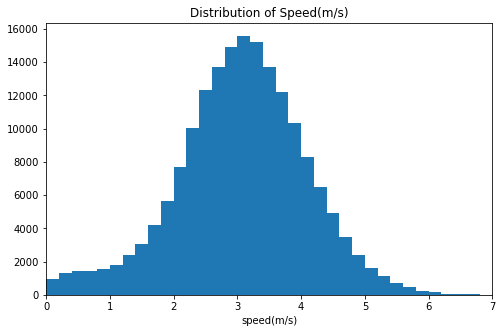

In [9]:
bin_size=0.2
bin_edge= np.arange(0,ford['speed'].max()+bin_size,bin_size)
plt.figure(figsize=[8,5])
plt.hist(data=ford,x='speed',bins=bin_edge)
plt.title('Distribution of Speed(m/s)')
plt.xlim([0,7])
plt.xlabel('speed(m/s)')
plt.show()

## A Bar Graph Depicting Hours of the Day and days of the week

> The graph shows that the time of the day that people use the bike share system the most is in the morning by 7am and in the evening by 5pm. While the second graph shows the day of the week that people use the bike share system the most which is on Monday and on Wednesday.

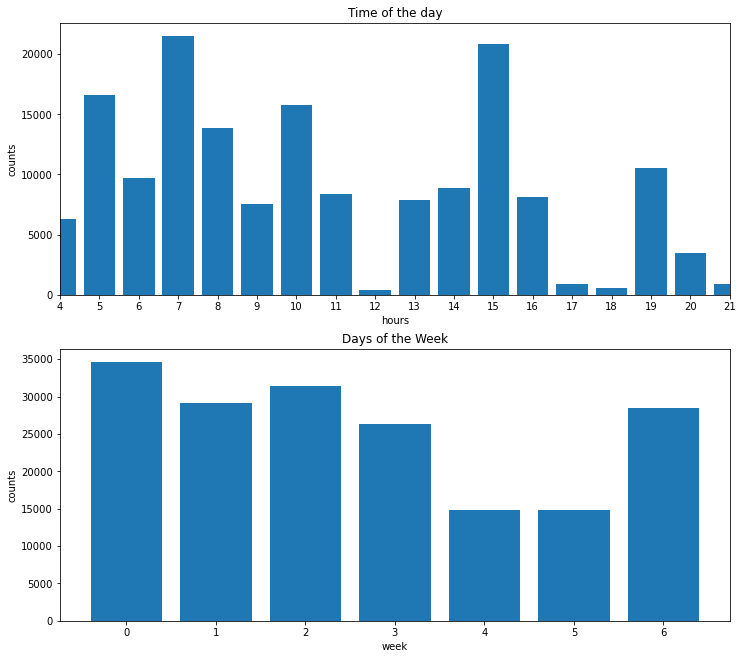

In [15]:
plt.figure(figsize=[12,11])
#for the first subplot
plt.subplot(2,1,1)
x = ford.hours.unique()
y= ford.hours.value_counts(sort=False)
plt.bar(x,y)
plt.xticks(range(0,25,1))
plt.xlim([4,21])
plt.title('Time of the day')
plt.xlabel('hours')
plt.ylabel('counts')

#for the second subplot
plt.subplot(2,1,2)
a= ford.week.unique()
b= ford.week.value_counts(sort=False)
plt.bar(a,b)
plt.xticks(range(0,7,1))
plt.title('Days of the Week')
plt.xlabel('week')
plt.ylabel('counts')
plt.show()

## Speed Vs. Age Group

> There is a great relationship between Speed and Age_group. Which shows that younger people tend to move with more speed than the 



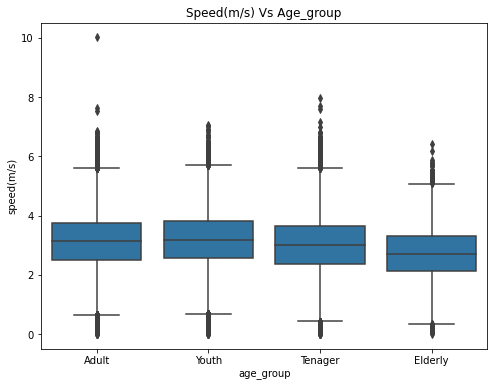

In [16]:
plt.figure(figsize=[8,6])
base_color = sb.color_palette()[0]
sb.boxplot(data=ford,x='age_group',y='speed',color=base_color)
plt.title('Speed(m/s) Vs Age_group')
plt.ylabel('speed(m/s)')
plt.show()

## Speed by Distance and Age Group
>  It can be seen that there is a relationship between the three feature.

From the above the age_group had their ranges of their speed and the distances that they covered.

> The `Tenagers` had an average speed between 1m/s and 5m/s and covered a range of distance of 400m- 1300m.

> The `Youths` had an average speed between 2m/s and 5m/s and covered a range of distance of 600m-1400m.

> The `Adults` had an average speed between 2m/s and 4m/s and covered a range of distance of 800m - 1400m.

> The `Elderly's` had an average speed between 2m/s and 3m/s and covered a range of distance of 300m-1100m.

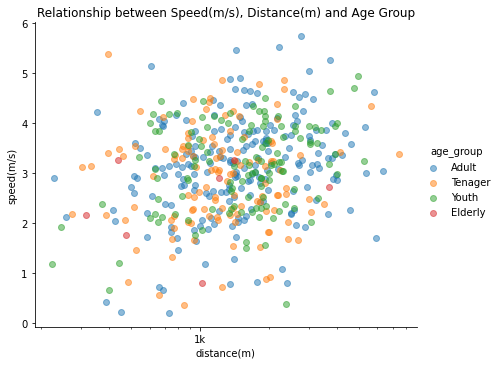

In [10]:
ford_subset= ford.sample(n=500,replace=False)
g= sb.FacetGrid(data=ford_subset,hue='age_group',height=5,aspect=1.2)
g.map(plt.scatter,'distance','speed',alpha=1/2)
plt.title('Relationship between Speed(m/s), Distance(m) and Age Group')
plt.xscale('log')
plt.xticks([1e3],['1k'])
plt.ylabel('speed(m/s)')
plt.xlabel('distance(m)')
g.add_legend()
plt.show()

In [ ]:
jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt